![](https://www.spaceotechnologies.com/wp-content/themes/spaceotechnologies/images/restaurant-app/logo-01.png)

                                                                                            --Kanav Anand(IIT kharagpur)
                                                                                            Inustrial and Systems Engineering

- <a href='#intro'>1. Content:</a>  
- <a href='#rtd'>2. Retrieving the Data</a>
     - <a href='#ll'>2.1 Load libraries</a>
     - <a href='#td'>2.2 Read the Data</a>
     - <a href='#ll2'>2.3 Which data to use?</a>

- <a href='#god'>3. Feature Engineering</a>
     - <a href='#ot'>3.1 Drivers Engaged</a>
     - <a href='#ot2'>3.2 Backbone of my Analysis(Feature Engineering)</a>
     - <a href='#ot3'>3.3 Exploring hidden hints and making features.</a>
     - <a href='#ot4'>3.4 Making Features using order file</a>
     - <a href='#ot5'>3.5 Aggregate features on order file.</a>
     - <a href='#ot6'>3.6 Number of months a person visit.</a>
     - <a href='#ot7'>3.7 Approximate month interval after which person make visits.</a>
     - <a href='#ot6'>3.8 Date-time based features.</a>
- <a href='#nlp'>4.Making Model.</a>


## Initially I have done some preprocessing in excel, So please use all the files in ZIP.

# <a id='rtd'>2. Retrieving the Data</a>

## <a id='ll'>2.1 Load libraries</a>

In [2]:
import pandas as pd
import numpy as np

train=pd.read_csv('post_stockout_train_candidate.csv',parse_dates=['time_stamp_utc'])
pre_stock = pd.read_csv('pre_stockout_train_candidate.csv',parse_dates=['time_stamp_utc'])
order =pd.read_csv('pre_and_post_orders_data_train.csv')
order_test = pd.read_csv('test/pre_orders_data_test.csv',parse_dates=['device_acknowledge_at'])
pre_stock_test =pd.read_csv('test/pre_stockout_test_candidate.csv')
test =pd.read_csv('test/post_stockout_test_candidate.csv')
driver_log=pd.read_csv('pre_and_post_driver_log_train_candidate.csv')
driver_log_test=pd.read_csv('test/pre_driver_log_test_candidate.csv')

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
train.head()

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,stockout,hour,minute,second,weekday
0,koramangala,29JAN2018:13:00:24,29-Jan-18,12.952484,77.6228,18460060,0,13,0,24,2
1,koramangala,29JAN2018:13:00:48,29-Jan-18,12.952484,77.6228,18460060,0,13,0,48,2
2,koramangala,29JAN2018:13:02:11,29-Jan-18,12.952484,77.6228,18460060,0,13,2,11,2
3,koramangala,29JAN2018:13:02:38,29-Jan-18,12.952484,77.6228,18460060,0,13,2,38,2
4,koramangala,29JAN2018:13:03:10,29-Jan-18,12.952484,77.6228,18460060,0,13,3,10,2


In [5]:
test.head()

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,hour,minute,second,weekday
0,btm_layout,29JAN2018:13:31:23,29-Jan-18,12.935899,77.6078,50372,13,31,23,2
1,btm_layout,29JAN2018:13:31:49,29-Jan-18,12.935899,77.6078,50619,13,31,49,2
2,btm_layout,29JAN2018:13:32:23,29-Jan-18,12.935899,77.6078,51154,13,32,23,2
3,btm_layout,29JAN2018:13:32:50,29-Jan-18,12.935899,77.6078,52859,13,32,50,2
4,btm_layout,29JAN2018:13:34:21,29-Jan-18,12.935899,77.6078,57362,13,34,21,2


In [6]:
pre_stock.head()

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,stockout,hour,minute,second,weekday
0,koramangala,03JAN2018:15:15:12,3-Jan-18,12.952484,77.6228,18460060,1,15,15,12,4
1,koramangala,03JAN2018:15:15:39,3-Jan-18,12.952484,77.6228,18460060,1,15,15,39,4
2,koramangala,03JAN2018:15:18:18,3-Jan-18,12.952484,77.6228,18460060,1,15,18,18,4
3,koramangala,03JAN2018:15:18:45,3-Jan-18,12.952484,77.6228,18460060,1,15,18,45,4
4,koramangala,03JAN2018:15:19:15,3-Jan-18,12.952484,77.6228,18460060,1,15,19,15,4


In [7]:
pre_stock_test.head()

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,stockout,hour,minute,second,weekday
0,btm_layout,01JAN2018:13:32:20,1-Jan-18,12.935899,77.6078,50372,1,13,32,20,2
1,btm_layout,01JAN2018:13:32:47,1-Jan-18,12.935899,77.6078,50619,1,13,32,47,2
2,btm_layout,01JAN2018:13:33:15,1-Jan-18,12.935899,77.6078,51154,1,13,33,15,2
3,btm_layout,01JAN2018:13:33:42,1-Jan-18,12.935899,77.6078,52859,1,13,33,42,2
4,btm_layout,01JAN2018:13:34:16,1-Jan-18,12.935899,77.6078,57362,1,13,34,16,2


## <a id='ll'>2.3 Which data to use?</a>

# Here i am combining all the 3 data so as to collect the data of all files and removing 1st jan which is an outlier
>Here i have removed the data of 1st Jan because it was **new year**, and as we can see the number of stockouts were too high  so we should remove it from our current analysis because .We are analysing for a month and it was an outlier because our test dataset does not contain any "Holiday or festival"

See here, there are around 8000 stockouts on single day!

In [8]:
pre_stock.groupby(by='dt')['stockout'].sum().sort_values(ascending=False)

dt
1-Jan-18     8183
15-Jan-18    3245
24-Jan-18    3056
21-Jan-18    2906
28-Jan-18    2898
18-Jan-18    2649
14-Jan-18    2450
20-Jan-18    2428
19-Jan-18    2296
25-Jan-18    2231
7-Jan-18     1806
5-Jan-18     1029
13-Jan-18    1020
11-Jan-18    1019
6-Jan-18      919
12-Jan-18     692
8-Jan-18      647
22-Jan-18     594
4-Jan-18      517
3-Jan-18      402
27-Jan-18     339
17-Jan-18     280
26-Jan-18     266
10-Jan-18     197
23-Jan-18     160
16-Jan-18      92
9-Jan-18       42
2-Jan-18       21
Name: stockout, dtype: int64

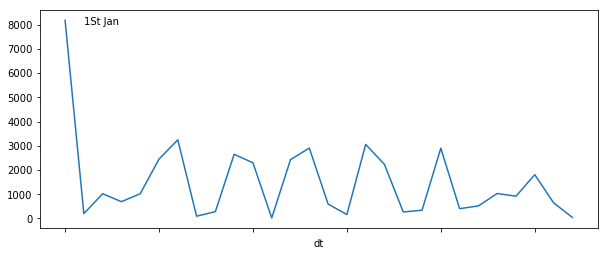

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
pre_stock.groupby(by='dt')['stockout'].sum().plot(figsize=(10,4))
plt.xticks(rotation=40)

plt.annotate("1St Jan",xy=(1,8000))

In [18]:
order['created_at']=pd.to_datetime(order.created_at)
order['complete_at']=pd.to_datetime(order.complete_at)

order_test['created_at']=pd.to_datetime(order_test.created_at)
order_test['complete_at']=pd.to_datetime(order_test.complete_at)

In [19]:
order['date_create']=order.created_at.dt.date
order_test['date_create']=order_test.created_at.dt.date

In [20]:
order['unique']=1

In [21]:
pre_stock_test.columns

Index(['geography', 'time_stamp_utc', 'dt', 'Latitude', 'Longitude', 'res_id',
       'stockout', 'hour', 'minute', 'second', 'weekday'],
      dtype='object')

In [22]:
col = [ 'time_stamp_utc', 'dt', 'Latitude', 'Longitude', 
       'stockout', 'hour', 'minute', 'second', 'weekday']
alldata =pd.concat([train[col],pre_stock[col],pre_stock_test[col]],axis=0).reset_index(drop=True)

alldata.dt.value_counts().index

Index(['31-Jan-18', '30-Jan-18', '29-Jan-18', '1-Jan-18', '28-Jan-18',
       '21-Jan-18', '14-Jan-18', '19-Jan-18', '15-Jan-18', '24-Jan-18',
       '20-Jan-18', '18-Jan-18', '7-Jan-18', '25-Jan-18', '13-Jan-18',
       '6-Jan-18', '8-Jan-18', '11-Jan-18', '5-Jan-18', '22-Jan-18',
       '12-Jan-18', '16-Jan-18', '10-Jan-18', '4-Jan-18', '17-Jan-18',
       '27-Jan-18', '3-Jan-18', '9-Jan-18', '26-Jan-18', '23-Jan-18',
       '2-Jan-18'],
      dtype='object')

In [23]:
alldata =pd.concat([train[col],pre_stock[col],pre_stock_test[col]],axis=0).reset_index(drop=True)
alldata_out =  alldata.loc[alldata.dt != '1-Jan-18'].reset_index(drop=True)
alldata_out.shape

(110845, 9)

# <a id='god'>3. Feature Engineering</a>

## <a id='ot'>3.1  Drivers Engaged</a>

> Here i am calculating how many drivers are engaged in given train-test combination of times. This would give us average engagement of a driver at particular time interval.

** Note: this would take 5-6 hours.

In [24]:
df = order.loc[(order.state=='COMPLETE')&(order.created_at.dt.day>29)].reset_index()

In [25]:
df.head()

,index,created_at,city,res_id,pickup_locality,pickup_latitude,pickup_longitude,drop_locality,drop_latitude,drop_longitude,total_amount,driver_id,shipment_creation_time,device_acknowledge_at,device_acknowledge_latitude,device_acknowledge_longitude,device_acknowledge_location_update_time,driver_assigned_at,driver_assigned_latitude,driver_assigned_longitude,driver_assigned_location_update_time,reached_shop_at,reached_shop_latitude,reached_shop_longitude,reached_shop_location_update_time,shipped_at,shipped_latitude,shipped_longitude,shipped_location_update_time,reached_customer_at,reached_customer_latitude,reached_customer_longitude,reached_customer_location_update_time,complete_at,complete_latitude,pickup_to_drop_location_km,pickup_to_drop_location_aerial_km,state,date_create,unique
0,13792,2018-01-30 04:56:00,Bangalore,50915.0,Koramangala,12.937196,77.619677,Koramangala,12.940642,77.626361,112.50,25741.0,30-01-2018 04:58,30-01-2018 04:58,12.937196,77.619677,58:19.7,30-01-2018 04:58,12.933848,77.631955,58:25.3,30-01-2018 05:22,12.937010,77.619546,22:12.2,30-01-2018 05:25,12.937010,77.619546,25:20.2,30-01-2018 05:35,12.940603,77.626469,35:54.0,2018-01-30 05:37:00,12.940642,1.109,0.820204,COMPLETE,2018-01-30,1
1,13793,2018-01-30 05:45:00,Bangalore,56643.0,Koramangala,12.938534,77.625848,Koramangala,12.937178,77.632161,186.45,22599.0,30-01-2018 05:45,30-01-2018 05:45,12.938534,77.625848,45:04.3,30-01-2018 05:45,12.938980,77.626658,45:14.0,30-01-2018 05:54,12.938967,77.626122,54:07.5,30-01-2018 06:00,12.938912,77.626087,00:17.6,30-01-2018 06:08,12.937140,77.632059,07:38.5,2018-01-30 06:08:00,12.937177,1.428,0.701206,COMPLETE,2018-01-30,1
2,13794,2018-01-30 06:13:00,Bangalore,18140795.0,HSR Layout,12.906923,77.634010,Bommanahalli,12.906439,77.637237,120.00,23795.0,30-01-2018 06:21,30-01-2018 06:21,12.906923,77.634010,21:24.2,30-01-2018 06:21,12.908418,77.630190,21:32.5,30-01-2018 06:28,12.906972,77.633888,28:16.9,30-01-2018 06:32,12.907025,77.633883,32:35.0,30-01-2018 06:36,12.906439,77.637237,36:55.5,2018-01-30 06:37:00,12.906439,0.378,0.354197,COMPLETE,2018-01-30,1
3,13795,2018-01-30 06:35:00,Bangalore,18567348.0,Koramangala,12.936446,77.615080,Koramangala,12.937649,77.612512,132.50,24090.0,30-01-2018 06:40,30-01-2018 06:40,12.936446,77.615080,40:48.9,30-01-2018 06:40,12.935282,77.615510,40:48.9,30-01-2018 06:47,12.936425,77.615014,47:55.7,30-01-2018 06:51,12.936418,77.615022,51:43.3,30-01-2018 06:56,12.937649,77.612512,54:18.6,2018-01-30 06:56:00,12.937649,0.322,0.309059,COMPLETE,2018-01-30,1
4,13796,2018-01-30 06:53:00,Bangalore,18369854.0,HSR Layout,12.909229,77.638201,HSR Layout,12.913618,77.644788,537.08,21735.0,30-01-2018 06:54,30-01-2018 06:54,12.909229,77.638201,54:04.0,30-01-2018 06:54,12.910362,77.638084,54:04.0,30-01-2018 07:03,12.909019,77.638124,03:45.6,30-01-2018 07:18,12.909200,77.638038,18:17.2,30-01-2018 07:42,12.913618,77.644788,41:36.6,2018-01-30 07:42:00,12.913618,1.185,0.865574,COMPLETE,2018-01-30,1


In [26]:
df2 = order_test.loc[(order_test.state=='COMPLETE')&(order_test.created_at.dt.day>29)].reset_index()

In [ ]:
order_test.loc[(order_test.state=='COMPLETE')&(order_test.created_at.dt.day>25)].reset_index().shape

In [ ]:
from tqdm import tqdm

##### i saved a  backup here(train_driver.csv which contains driver engaged)

In [116]:
train.head()

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,stockout,hour,minute,second,weekday
0,koramangala,29JAN2018:13:00:24,29-Jan-18,12.952484,77.6228,18460060,0,13,0,24,2
1,koramangala,29JAN2018:13:00:48,29-Jan-18,12.952484,77.6228,18460060,0,13,0,48,2
2,koramangala,29JAN2018:13:02:11,29-Jan-18,12.952484,77.6228,18460060,0,13,2,11,2
3,koramangala,29JAN2018:13:02:38,29-Jan-18,12.952484,77.6228,18460060,0,13,2,38,2
4,koramangala,29JAN2018:13:03:10,29-Jan-18,12.952484,77.6228,18460060,0,13,3,10,2


In [117]:
train=pd.read_csv('train_driver.csv')
test =pd.read_csv('test/post_stockout_test_candidate.csv')


In [118]:
train.head()

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,stockout,hour,minute,second,weekday,drivers_engaged
0,koramangala,29JAN2018:13:00:24,29-Jan-18,12.952484,77.6228,18460060,0,13,0,24,2,0
1,koramangala,29JAN2018:13:00:48,29-Jan-18,12.952484,77.6228,18460060,0,13,0,48,2,0
2,koramangala,29JAN2018:13:02:11,29-Jan-18,12.952484,77.6228,18460060,0,13,2,11,2,0
3,koramangala,29JAN2018:13:02:38,29-Jan-18,12.952484,77.6228,18460060,0,13,2,38,2,0
4,koramangala,29JAN2018:13:03:10,29-Jan-18,12.952484,77.6228,18460060,0,13,3,10,2,0


In [119]:
train.head()

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,stockout,hour,minute,second,weekday,drivers_engaged
0,koramangala,29JAN2018:13:00:24,29-Jan-18,12.952484,77.6228,18460060,0,13,0,24,2,0
1,koramangala,29JAN2018:13:00:48,29-Jan-18,12.952484,77.6228,18460060,0,13,0,48,2,0
2,koramangala,29JAN2018:13:02:11,29-Jan-18,12.952484,77.6228,18460060,0,13,2,11,2,0
3,koramangala,29JAN2018:13:02:38,29-Jan-18,12.952484,77.6228,18460060,0,13,2,38,2,0
4,koramangala,29JAN2018:13:03:10,29-Jan-18,12.952484,77.6228,18460060,0,13,3,10,2,0


# <a id='ot2'>3.2 Backbone of my Analysis(Feature Engineering)</a>

### Making Aggregate features like 

**Concat the train and test and make features like**<br>
>1) Stockout on day of week<br>
2)stockout in the hour of a day<br>
3)stockout in the hour of second<br>
4)stockout in the hour of every day  of week<br>
5)stockout in the minute of an hour of every day  of week<br>
6)Stockout in particular residential id.<br>
7)Stockout in particular residential id for a particular hour<br>
8)Stockout in particular residential id for a particular hour in that minute<br>




In [120]:

#train.head()
def upd(train,pre_stock):
    train = train.merge(pd.DataFrame(alldata_out.groupby(by=['weekday'])['stockout'].sum()).reset_index(),on='weekday',how='left',suffixes=('','_week'))
    train = train.merge(pd.DataFrame(alldata_out.groupby(by=['hour'])['stockout'].sum()).reset_index(),on='hour',how='left',suffixes=('','_hour'))
    train = train.merge(pd.DataFrame(alldata_out.groupby(by=['second'])['stockout'].sum()).reset_index(),on='second',how='left',suffixes=('','_second'))

    train.head()


    train = train.merge(pd.DataFrame(alldata_out.groupby(by=['weekday','hour'])['stockout'].sum()).reset_index(),on=['weekday','hour'],how='left',suffixes=('','_week_hour'))
    train = train.merge(pd.DataFrame(alldata_out.groupby(by=['hour','minute'])['stockout'].sum()).reset_index(),on=['hour','minute'],how='left',suffixes=('','_hour_minute'))

    train.fillna(0,inplace=True)

    train = train.merge(pd.DataFrame(alldata_out.groupby(by=['weekday','hour','minute'])['stockout'].sum()).reset_index(),on=['weekday','hour','minute'],how='left',suffixes=('','_hour_week_minute'))
    train = train.merge(pd.DataFrame(pre_stock.groupby(by=['res_id'])['stockout'].sum()).reset_index(),on='res_id',how='left',suffixes=('','_x'))




    train = train.merge(pd.DataFrame(pre_stock.groupby(by=['res_id','hour'])['stockout'].sum()).reset_index(),on=['res_id','hour'],how='left',suffixes=('','_hour_res'))

    train.fillna(0,inplace=True)

    train = train.merge(pd.DataFrame(pre_stock.groupby(by=['res_id','hour','minute'])['stockout'].sum()).reset_index(),on=['res_id','hour','minute'],how='left',suffixes=('','_hour_res_minute'))
#;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
    
    train = train.merge(pd.DataFrame(pre_stock.groupby(by=['res_id'])['stockout'].count()).reset_index(),on='res_id',how='left',suffixes=('','_countx'))




    train = train.merge(pd.DataFrame(pre_stock.groupby(by=['res_id','hour'])['stockout'].count()).reset_index(),on=['res_id','hour'],how='left',suffixes=('','_counthour_res'))

    train.fillna(0,inplace=True)

    train = train.merge(pd.DataFrame(pre_stock.groupby(by=['res_id','hour','minute'])['stockout'].count()).reset_index(),on=['res_id','hour','minute'],how='left',suffixes=('','_counthour_res_minute'))

    train.fillna(0,inplace=True)
    return train

### Processing date 

In [121]:
from datetime import datetime
import datetime
def dat1(X):
    return(datetime.datetime.strptime(X, "%d%b%Y:%H:%M:%S"))

In [122]:
tm=train.time_stamp_utc.apply(dat1)

In [123]:
tm2=test.time_stamp_utc.apply(dat1)

In [124]:
train =upd(train,pre_stock)
train.head()

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,stockout,hour,minute,second,weekday,drivers_engaged,stockout_week,stockout_hour,stockout_second,stockout_week_hour,stockout_hour_minute,stockout_hour_week_minute,stockout_x,stockout_hour_res,stockout_hour_res_minute,stockout_countx,stockout_counthour_res,stockout_counthour_res_minute
0,koramangala,29JAN2018:13:00:24,29-Jan-18,12.952484,77.6228,18460060,0,13,0,24,2,0,7387,2795,1565,438,2,0,951.0,0.0,0.0,951.0,0.0,0.0
1,koramangala,29JAN2018:13:00:48,29-Jan-18,12.952484,77.6228,18460060,0,13,0,48,2,0,7387,2795,2366,438,2,0,951.0,0.0,0.0,951.0,0.0,0.0
2,koramangala,29JAN2018:13:02:11,29-Jan-18,12.952484,77.6228,18460060,0,13,2,11,2,0,7387,2795,788,438,147,20,951.0,0.0,0.0,951.0,0.0,0.0
3,koramangala,29JAN2018:13:02:38,29-Jan-18,12.952484,77.6228,18460060,0,13,2,38,2,0,7387,2795,596,438,147,20,951.0,0.0,0.0,951.0,0.0,0.0
4,koramangala,29JAN2018:13:03:10,29-Jan-18,12.952484,77.6228,18460060,0,13,3,10,2,0,7387,2795,332,438,48,8,951.0,0.0,0.0,951.0,0.0,0.0


In [125]:
test =upd(test,pre_stock_test)
test= test.merge(pd.DataFrame(alldata_out.groupby(by=['weekday'])['stockout'].sum()).reset_index(),on='weekday',how='left',suffixes=('','_week'))

test.head()

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,hour,minute,second,weekday,stockout,stockout_hour,stockout_second,stockout_week_hour,stockout_hour_minute,stockout_hour_week_minute,stockout_x,stockout_hour_res,stockout_hour_res_minute,stockout_countx,stockout_counthour_res,stockout_counthour_res_minute,stockout_week
0,btm_layout,29JAN2018:13:31:23,29-Jan-18,12.935899,77.6078,50372,13,31,23,2,7387,2795,2074,438,118,16,1.0,1.0,0.0,1.0,1.0,0.0,7387
1,btm_layout,29JAN2018:13:31:49,29-Jan-18,12.935899,77.6078,50619,13,31,49,2,7387,2795,2368,438,118,16,1.0,1.0,0.0,1.0,1.0,0.0,7387
2,btm_layout,29JAN2018:13:32:23,29-Jan-18,12.935899,77.6078,51154,13,32,23,2,7387,2795,2074,438,437,66,1.0,1.0,0.0,1.0,1.0,0.0,7387
3,btm_layout,29JAN2018:13:32:50,29-Jan-18,12.935899,77.6078,52859,13,32,50,2,7387,2795,2094,438,437,66,1.0,1.0,0.0,1.0,1.0,0.0,7387
4,btm_layout,29JAN2018:13:34:21,29-Jan-18,12.935899,77.6078,57362,13,34,21,2,7387,2795,2125,438,254,44,1.0,1.0,1.0,1.0,1.0,1.0,7387


# <a id='ot3'>3.3 Exploring hidden hints and making features.</a>


## This is the minute stockout  history on every day-of-week basis

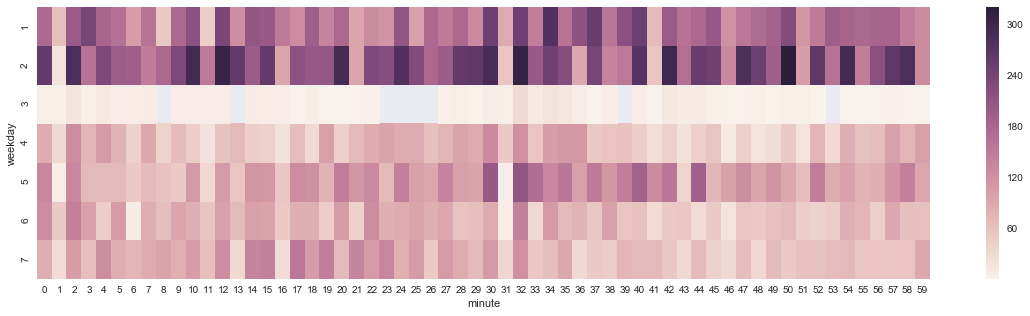

In [126]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.heatmap(pre_stock.pivot_table(index='weekday',columns='minute',values='stockout',aggfunc=sum),linecolor='black')

In [127]:
min_graph=pre_stock.pivot_table(index='weekday',columns='minute',values='stockout',aggfunc=sum)
min_graph

minute,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
weekday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,176.0,64.0,200.0,239.0,182.0,166.0,105.0,161.0,53.0,179.0,218.0,46.0,236.0,125.0,209.0,202.0,153.0,128.0,193.0,139.0,179.0,95.0,129.0,116.0,209.0,103.0,178.0,152.0,177.0,130.0,250.0,89.0,247.0,148.0,280.0,161.0,214.0,256.0,158.0,218.0,251.0,69.0,201.0,162.0,179.0,205.0,120.0,156.0,173.0,188.0,226.0,115.0,151.0,195.0,184.0,177.0,185.0,184.0,147.0,129.0
2,260.0,19.0,284.0,162.0,232.0,196.0,193.0,149.0,179.0,235.0,295.0,155.0,307.0,260.0,199.0,259.0,96.0,216.0,206.0,207.0,292.0,96.0,231.0,223.0,278.0,228.0,178.0,199.0,259.0,264.0,290.0,57.0,311.0,202.0,247.0,224.0,92.0,238.0,139.0,155.0,274.0,57.0,299.0,168.0,256.0,248.0,134.0,283.0,249.0,194.0,320.0,105.0,266.0,163.0,293.0,148.0,221.0,266.0,284.0,129.0
3,5.0,4.0,17.0,4.0,11.0,6.0,6.0,9.0,NaN,7.0,6.0,6.0,6.0,NaN,9.0,6.0,7.0,2.0,5.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,3.0,5.0,2.0,6.0,5.0,30.0,11.0,20.0,15.0,8.0,2.0,6.0,NaN,6.0,2.0,14.0,9.0,10.0,4.0,2.0,2.0,4.0,2.0,4.0,4.0,2.0,NaN,2.0,1.0,2.0,3.0,2.0,2.0
4,88.0,32.0,128.0,77.0,108.0,79.0,41.0,92.0,40.0,68.0,46.0,22.0,60.0,71.0,46.0,43.0,21.0,66.0,31.0,101.0,45.0,72.0,86.0,97.0,88.0,90.0,64.0,77.0,97.0,90.0,130.0,52.0,123.0,58.0,105.0,113.0,112.0,53.0,57.0,60.0,47.0,27.0,43.0,21.0,45.0,57.0,11.0,45.0,20.0,28.0,50.0,19.0,76.0,30.0,83.0,61.0,66.0,101.0,75.0,101.0
5,133.0,7.0,134.0,71.0,72.0,71.0,52.0,70.0,60.0,50.0,110.0,34.0,107.0,56.0,114.0,112.0,54.0,126.0,123.0,79.0,147.0,114.0,131.0,72.0,145.0,102.0,94.0,140.0,102.0,98.0,203.0,8.0,211.0,170.0,134.0,157.0,103.0,152.0,115.0,148.0,189.0,129.0,158.0,39.0,191.0,74.0,100.0,126.0,96.0,118.0,94.0,66.0,148.0,89.0,102.0,79.0,82.0,117.0,144.0,94.0
6,126.0,51.0,144.0,102.0,46.0,109.0,9.0,85.0,65.0,95.0,84.0,59.0,102.0,71.0,101.0,98.0,51.0,83.0,85.0,46.0,106.0,42.0,127.0,82.0,87.0,97.0,82.0,93.0,59.0,63.0,87.0,7.0,144.0,31.0,110.0,70.0,79.0,55.0,102.0,58.0,62.0,29.0,52.0,54.0,29.0,51.0,19.0,55.0,53.0,62.0,70.0,46.0,41.0,48.0,82.0,75.0,45.0,92.0,63.0,62.0
7,85.0,28.0,105.0,63.0,128.0,85.0,77.0,87.0,98.0,81.0,106.0,64.0,125.0,32.0,138.0,144.0,28.0,156.0,109.0,147.0,71.0,140.0,107.0,136.0,81.0,109.0,50.0,107.0,88.0,70.0,110.0,35.0,123.0,54.0,65.0,94.0,32.0,50.0,48.0,76.0,72.0,71.0,54.0,31.0,69.0,42.0,33.0,66.0,34.0,70.0,50.0,61.0,62.0,66.0,72.0,58.0,57.0,55.0,58.0,93.0


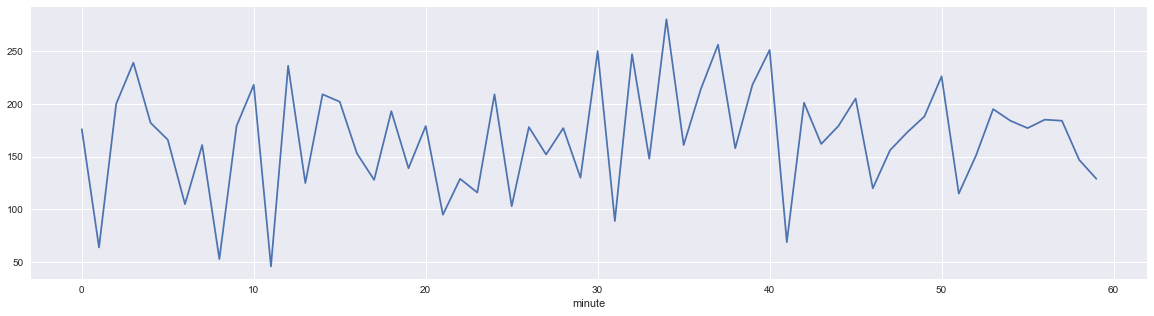

In [128]:
plt.figure(figsize=(20,5))
min_graph.loc[1].plot()

In [129]:
sec_graph=pre_stock.pivot_table(index='weekday',columns='second',values='stockout',aggfunc=sum)
sec_graph

second,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
weekday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,1.0,5.0,9.0,50.0,151.0,212.0,263.0,306.0,286.0,310.0,301.0,333.0,325.0,397.0,432.0,381.0,364.0,278.0,211.0,140.0,93.0,74.0,29.0,23.0,17.0,19.0,8.0,4.0,1.0,7.0,33.0,103.0,172.0,276.0,333.0,338.0,331.0,281.0,289.0,321.0,434.0,476.0,448.0,383.0,265.0,201.0,127.0,102.0,78.0,31.0,5.0,2.0,1.0
2,NaN,NaN,NaN,NaN,1.0,13.0,68.0,232.0,311.0,409.0,429.0,477.0,349.0,475.0,510.0,541.0,546.0,465.0,450.0,401.0,278.0,156.0,102.0,65.0,18.0,17.0,17.0,3.0,1.0,4.0,2.0,4.0,3.0,28.0,118.0,351.0,415.0,454.0,430.0,401.0,515.0,510.0,524.0,583.0,551.0,477.0,417.0,283.0,149.0,57.0,32.0,15.0,5.0,4.0,3.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,3.0,3.0,6.0,9.0,19.0,14.0,22.0,12.0,29.0,13.0,14.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,1.0,4.0,6.0,7.0,15.0,18.0,19.0,30.0,21.0,15.0,5.0,4.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,2.0,NaN,NaN,5.0,24.0,68.0,113.0,117.0,131.0,143.0,97.0,104.0,144.0,146.0,176.0,136.0,141.0,122.0,125.0,78.0,39.0,13.0,11.0,10.0,10.0,8.0,1.0,1.0,2.0,NaN,NaN,14.0,52.0,111.0,102.0,139.0,156.0,132.0,116.0,155.0,141.0,175.0,160.0,171.0,155.0,92.0,47.0,24.0,16.0,9.0,1.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,1.0,5.0,18.0,92.0,164.0,221.0,233.0,213.0,190.0,192.0,192.0,190.0,292.0,274.0,199.0,218.0,182.0,103.0,61.0,59.0,25.0,27.0,22.0,17.0,14.0,6.0,8.0,2.0,2.0,19.0,58.0,119.0,196.0,244.0,236.0,184.0,192.0,207.0,217.0,265.0,259.0,283.0,271.0,186.0,131.0,39.0,31.0,12.0,11.0,4.0,28.0,NaN
6,NaN,2.0,3.0,3.0,NaN,NaN,NaN,1.0,20.0,75.0,102.0,144.0,131.0,138.0,123.0,125.0,155.0,103.0,155.0,139.0,182.0,179.0,121.0,82.0,53.0,39.0,17.0,22.0,7.0,11.0,1.0,5.0,9.0,4.0,NaN,6.0,63.0,119.0,119.0,172.0,173.0,142.0,141.0,99.0,107.0,177.0,165.0,163.0,136.0,141.0,80.0,61.0,24.0,19.0,11.0,8.0,3.0,3.0
7,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,19.0,44.0,91.0,151.0,154.0,119.0,126.0,158.0,168.0,210.0,184.0,165.0,176.0,193.0,131.0,116.0,66.0,46.0,29.0,7.0,7.0,7.0,5.0,3.0,7.0,1.0,5.0,1.0,21.0,71.0,114.0,149.0,120.0,127.0,170.0,189.0,186.0,226.0,187.0,188.0,188.0,147.0,85.0,66.0,27.0,29.0,7.0,11.0,3.0,NaN


# This is the one of the most shocking observation here, as you can see there is very high probability of getting a stockout during between 11-25 and 41-55 seconds of every minute.


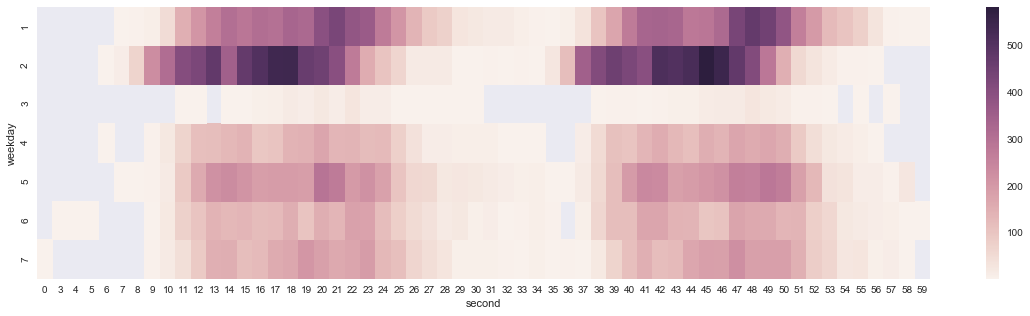

In [130]:
plt.figure(figsize=(20,5))

sns.heatmap(pre_stock.pivot_table(index='weekday',columns='second',values='stockout',aggfunc=sum),linecolor='black')

##### you can see that is somewhat perfect normal

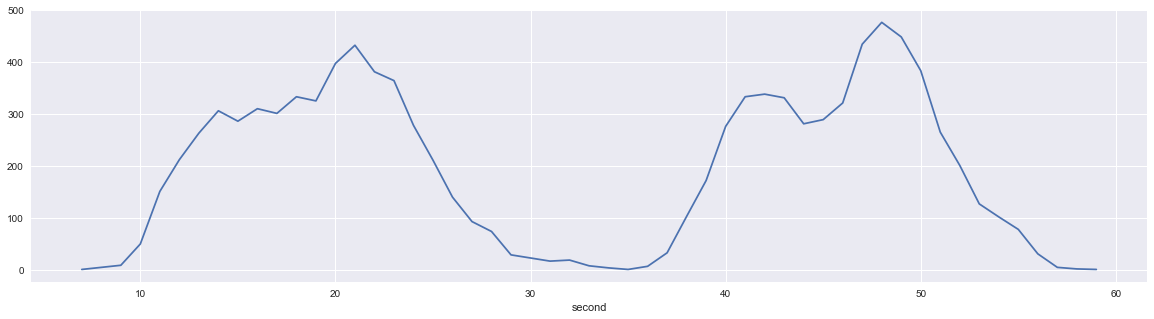

In [131]:
plt.figure(figsize=(20,5))
sec_graph.loc[1].plot()

## Inference:
>So we can infer that there could be two possible case:<br>
1)As stockout starts occuring the Zomato's iternal system may alert the Part time driver.<br>
2)The data-organisers may have generated the random time samples where it was not uniform but somewhat normal.


# Using the Above fact lets discover a new feature based on Seconds

In [132]:
a=[]
for i in train.second:
    if i<15:
        a.append(i)
    elif i<30:
        a.append(30-i)
    elif i<45:
        a.append(i-30)
    else:
        a.append(60-i)

In [133]:
train['sec_fun']=a
a=[]
for i in test.second:
    if i<15:
        a.append(i)
    elif i<30:
        a.append(30-i)
    elif i<45:
        a.append(i-30)
    else:
        a.append(60-i)
test['sec_fun']=a
        

In [134]:
train.columns

Index(['geography', 'time_stamp_utc', 'dt', 'Latitude', 'Longitude', 'res_id',
       'stockout', 'hour', 'minute', 'second', 'weekday', 'drivers_engaged',
       'stockout_week', 'stockout_hour', 'stockout_second',
       'stockout_week_hour', 'stockout_hour_minute',
       'stockout_hour_week_minute', 'stockout_x', 'stockout_hour_res',
       'stockout_hour_res_minute', 'stockout_countx', 'stockout_counthour_res',
       'stockout_counthour_res_minute', 'sec_fun'],
      dtype='object')

In [135]:
cat_vars =[  'res_id',
       'hour', 'minute', 'second', 'weekday', ]
cont_vars =['Latitude', 'Longitude','stockout_week',
       'stockout_hour', 'stockout_second', 'stockout_week_hour',
       'stockout_hour_minute', 'stockout_hour_week_minute', 'stockout_x',
       'stockout_hour_res', 'stockout_hour_res_minute', 'stockout_countx',
       'stockout_counthour_res', 'stockout_counthour_res_minute']

In [136]:
for v in cat_vars: train[v] = train[v].astype('category').cat.as_ordered()
for v in cont_vars: train[v] = train[v].astype('float32')
for v in cat_vars: test[v] = test[v].astype('category').cat.as_ordered()
for v in cont_vars: test[v] = test[v].astype('category').astype('float32')        

# <a id='ot4'>3.4 Making Features using order file.</a>


## Using  the order file , Let's try to calculate the total number of orders and aggregate features

In [137]:
order_comp=order.loc[order.state=='COMPLETE']
order_comp_test=order_test.loc[order.state=='COMPLETE']

#### Getting day time features for the order_file.

In [138]:
order_comp['day']=order_comp.created_at.dt.day
order_comp['hour']=order_comp.created_at.dt.hour
order_comp['weekday']=order_comp.created_at.dt.dayofweek
order_comp['geography']=order_comp.pickup_locality

order_comp_test['day']=order_comp_test.created_at.dt.day
order_comp_test['hour']=order_comp_test.created_at.dt.hour
order_comp_test['weekday']=order_comp_test.created_at.dt.dayofweek
order_comp_test['geography']=order_comp_test.pickup_locality

order_comp['count_order']=1
order_comp_test['count_order']=1



C:\Users\kanav\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\kanav\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\kanav\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

# <a id='nlp'>4.Preprocessing the data. </a>

In [139]:
def lower(x):
    return x.lower()
order_comp.geography=order_comp.geography.apply(lower)
train.geography=train.geography.apply(lower)

C:\Users\kanav\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [140]:
train.head()

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,stockout,hour,minute,second,weekday,drivers_engaged,stockout_week,stockout_hour,stockout_second,stockout_week_hour,stockout_hour_minute,stockout_hour_week_minute,stockout_x,stockout_hour_res,stockout_hour_res_minute,stockout_countx,stockout_counthour_res,stockout_counthour_res_minute,sec_fun
0,koramangala,29JAN2018:13:00:24,29-Jan-18,12.952484,77.622803,18460060,0,13,0,24,2,0,7387.0,2795.0,1565.0,438.0,2.0,0.0,951.0,0.0,0.0,951.0,0.0,0.0,6
1,koramangala,29JAN2018:13:00:48,29-Jan-18,12.952484,77.622803,18460060,0,13,0,48,2,0,7387.0,2795.0,2366.0,438.0,2.0,0.0,951.0,0.0,0.0,951.0,0.0,0.0,12
2,koramangala,29JAN2018:13:02:11,29-Jan-18,12.952484,77.622803,18460060,0,13,2,11,2,0,7387.0,2795.0,788.0,438.0,147.0,20.0,951.0,0.0,0.0,951.0,0.0,0.0,11
3,koramangala,29JAN2018:13:02:38,29-Jan-18,12.952484,77.622803,18460060,0,13,2,38,2,0,7387.0,2795.0,596.0,438.0,147.0,20.0,951.0,0.0,0.0,951.0,0.0,0.0,8
4,koramangala,29JAN2018:13:03:10,29-Jan-18,12.952484,77.622803,18460060,0,13,3,10,2,0,7387.0,2795.0,332.0,438.0,48.0,8.0,951.0,0.0,0.0,951.0,0.0,0.0,10


In [141]:
order_comp.replace({'hsr layout':'hsr_layout'},inplace=True)

C:\Users\kanav\Anaconda3\lib\site-packages\pandas\core\generic.py:4531: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  limit=limit, regex=regex)


In [142]:
from sklearn.preprocessing import LabelEncoder
le_geo=LabelEncoder()
order_comp.geography=le_geo.fit_transform(order_comp.geography)
train.geography=le_geo.fit_transform(train.geography)

order_comp_test.geography=le_geo.fit_transform(order_comp_test.geography)
test.geography=le_geo.fit_transform(test.geography)

C:\Users\kanav\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


###### Authors of the data have very cleverly organised data by only removing the data of 2nd Jan to 12th Jan and remaining data is now used for the predicting the orders per hour,order per week and orders per  day-hour combinaiton

In [143]:
train.head()

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,stockout,hour,minute,second,weekday,drivers_engaged,stockout_week,stockout_hour,stockout_second,stockout_week_hour,stockout_hour_minute,stockout_hour_week_minute,stockout_x,stockout_hour_res,stockout_hour_res_minute,stockout_countx,stockout_counthour_res,stockout_counthour_res_minute,sec_fun
0,1,29JAN2018:13:00:24,29-Jan-18,12.952484,77.622803,18460060,0,13,0,24,2,0,7387.0,2795.0,1565.0,438.0,2.0,0.0,951.0,0.0,0.0,951.0,0.0,0.0,6
1,1,29JAN2018:13:00:48,29-Jan-18,12.952484,77.622803,18460060,0,13,0,48,2,0,7387.0,2795.0,2366.0,438.0,2.0,0.0,951.0,0.0,0.0,951.0,0.0,0.0,12
2,1,29JAN2018:13:02:11,29-Jan-18,12.952484,77.622803,18460060,0,13,2,11,2,0,7387.0,2795.0,788.0,438.0,147.0,20.0,951.0,0.0,0.0,951.0,0.0,0.0,11
3,1,29JAN2018:13:02:38,29-Jan-18,12.952484,77.622803,18460060,0,13,2,38,2,0,7387.0,2795.0,596.0,438.0,147.0,20.0,951.0,0.0,0.0,951.0,0.0,0.0,8
4,1,29JAN2018:13:03:10,29-Jan-18,12.952484,77.622803,18460060,0,13,3,10,2,0,7387.0,2795.0,332.0,438.0,48.0,8.0,951.0,0.0,0.0,951.0,0.0,0.0,10


## correct the weekday

In [144]:
order_comp.head()

,created_at,city,res_id,pickup_locality,pickup_latitude,pickup_longitude,drop_locality,drop_latitude,drop_longitude,total_amount,driver_id,shipment_creation_time,device_acknowledge_at,device_acknowledge_latitude,device_acknowledge_longitude,device_acknowledge_location_update_time,driver_assigned_at,driver_assigned_latitude,driver_assigned_longitude,driver_assigned_location_update_time,reached_shop_at,reached_shop_latitude,reached_shop_longitude,reached_shop_location_update_time,shipped_at,shipped_latitude,shipped_longitude,shipped_location_update_time,reached_customer_at,reached_customer_latitude,reached_customer_longitude,reached_customer_location_update_time,complete_at,complete_latitude,pickup_to_drop_location_km,pickup_to_drop_location_aerial_km,state,date_create,unique,day,hour,weekday,geography,count_order
0,2018-01-01 03:52:00,Bangalore,18369812.0,HSR Layout,12.913377,77.636743,HSR Layout,12.918794,77.643636,234.00,19858.0,01-01-2018 03:57,01-01-2018 03:57,12.913377,77.636743,57:49.9,01-01-2018 03:58,12.911163,77.645047,58:01.7,01-01-2018 04:07,12.912745,77.636802,07:26.7,01-01-2018 04:20,12.915067,77.638542,20:22.9,01-01-2018 04:23,12.919423,77.642763,23:29.5,2018-01-01 04:31:00,12.918759,1.351,0.973827,COMPLETE,2018-01-01,1,1,3,0,0,1
3,2018-01-01 05:24:00,Bangalore,18432984.0,Koramangala,12.932813,77.614281,Koramangala,12.947571,77.621030,842.60,9482.0,01-01-2018 05:30,01-01-2018 05:30,12.932813,77.614281,30:29.1,01-01-2018 05:30,12.930951,77.608324,30:33.7,01-01-2018 05:53,12.932843,77.614252,53:48.1,01-01-2018 06:19,12.932866,77.614245,19:03.8,01-01-2018 06:39,12.947571,77.621030,39:33.5,2018-01-01 06:39:00,12.947571,3.871,1.798255,COMPLETE,2018-01-01,1,1,5,0,1,1
5,2018-01-01 05:59:00,Bangalore,18198889.0,Koramangala,12.934187,77.629972,Koramangala,12.940752,77.626271,200.03,24128.0,01-01-2018 05:59,01-01-2018 06:00,12.934187,77.629972,59:36.4,01-01-2018 06:00,12.927476,77.636291,59:36.4,01-01-2018 06:09,12.933819,77.630134,09:17.7,01-01-2018 06:23,12.933832,77.630142,23:51.7,01-01-2018 06:41,12.940814,77.626279,40:58.8,2018-01-01 06:43:00,12.940752,2.235,0.833678,COMPLETE,2018-01-01,1,1,5,0,1,1
6,2018-01-01 06:06:00,Bangalore,18590342.0,HSR Layout,12.913393,77.627379,HSR Layout,12.923199,77.647095,179.93,23795.0,01-01-2018 06:07,01-01-2018 06:07,12.913393,77.627379,07:05.5,01-01-2018 06:07,12.908002,77.630730,07:05.5,01-01-2018 06:12,12.913207,77.627518,12:17.4,01-01-2018 06:24,12.913353,77.627453,24:17.7,01-01-2018 06:38,12.923339,77.647137,37:36.3,2018-01-01 06:38:00,12.923199,3.130,2.401126,COMPLETE,2018-01-01,1,1,6,0,0,1
7,2018-01-01 06:25:00,Bangalore,18422886.0,HSR Layout,12.912722,77.653523,HSR Layout,12.903940,77.644820,322.56,22591.0,01-01-2018 06:25,01-01-2018 06:42,12.912722,77.653523,42:47.1,01-01-2018 06:42,12.927781,77.668063,42:56.2,01-01-2018 07:11,12.912764,77.653720,11:05.5,01-01-2018 07:11,12.912703,77.653564,11:44.5,01-01-2018 07:21,12.903940,77.644820,01-01-2018 07:21,2018-01-01 07:21:00,12.903940,2.000,1.358928,COMPLETE,2018-01-01,1,1,6,0,0,1


In [145]:
train.weekday=train.weekday-1
test.weekday=test.weekday-1

# <a id='ot5'>3.5 Aggregate features on order file.</a>


### Aggregate features.
> 1) Total orders within a geography in an hour of a weekday<br>
> 2) Total orders in a weekday<br>
> 3) Total orders in a day of hour.<br>
Combiing all of them with train

In [146]:
order_comp.loc[order_comp.day>1].groupby(by=['geography','weekday','hour'],as_index=False).count_order.sum()
order_comp.loc[order_comp.day>1].groupby(by=['weekday'],as_index=False).count_order.sum()
order_comp.loc[order_comp.day>1].groupby(by=['day','hour'],as_index=False).count_order.sum()

order_comp_test.loc[order_comp_test.day>1].groupby(by=['weekday','hour'],as_index=False).count_order.sum()
order_comp_test.loc[order_comp_test.day>1].groupby(by=['weekday'],as_index=False).count_order.sum()
order_comp_test.loc[order_comp_test.day>1].groupby(by=['day','hour'],as_index=False).count_order.sum()

train=train.merge(order_comp.loc[order_comp.day>1].groupby(by=['geography','weekday','hour'],as_index=False).count_order.sum(),on=['geography','weekday','hour']
            ,how='left')
train=train.merge(order_comp.loc[order_comp.day>1].groupby(by=['geography','weekday'],as_index=False).count_order.sum(),on=['geography','weekday']
            ,how='left')

train=train.merge(order_comp.loc[order_comp.day>1].groupby(by=['weekday','hour'],as_index=False).count_order.sum(),on=['weekday','hour']
            ,how='left',suffixes=('','_1'))
train=train.merge(order_comp.loc[order_comp.day>1].groupby(by=['weekday'],as_index=False).count_order.sum(),on=['weekday']
            ,how='left',suffixes=('','_2'))
#train=train.merge(order_comp.loc[order_comp.day>1].groupby(by=['day','hour'],as_index=False).count_order.sum(),on=['day','hour']
#            ,how='left')
train.head()

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,stockout,hour,minute,second,weekday,drivers_engaged,stockout_week,stockout_hour,stockout_second,stockout_week_hour,stockout_hour_minute,stockout_hour_week_minute,stockout_x,stockout_hour_res,stockout_hour_res_minute,stockout_countx,stockout_counthour_res,stockout_counthour_res_minute,sec_fun,count_order_x,count_order_y,count_order,count_order_2
0,1,29JAN2018:13:00:24,29-Jan-18,12.952484,77.622803,18460060,0,13,0,24,1,0,7387.0,2795.0,1565.0,438.0,2.0,0.0,951.0,0.0,0.0,951.0,0.0,0.0,6,109,1430,192,2649
1,1,29JAN2018:13:00:48,29-Jan-18,12.952484,77.622803,18460060,0,13,0,48,1,0,7387.0,2795.0,2366.0,438.0,2.0,0.0,951.0,0.0,0.0,951.0,0.0,0.0,12,109,1430,192,2649
2,1,29JAN2018:13:02:11,29-Jan-18,12.952484,77.622803,18460060,0,13,2,11,1,0,7387.0,2795.0,788.0,438.0,147.0,20.0,951.0,0.0,0.0,951.0,0.0,0.0,11,109,1430,192,2649
3,1,29JAN2018:13:02:38,29-Jan-18,12.952484,77.622803,18460060,0,13,2,38,1,0,7387.0,2795.0,596.0,438.0,147.0,20.0,951.0,0.0,0.0,951.0,0.0,0.0,8,109,1430,192,2649
4,1,29JAN2018:13:03:10,29-Jan-18,12.952484,77.622803,18460060,0,13,3,10,1,0,7387.0,2795.0,332.0,438.0,48.0,8.0,951.0,0.0,0.0,951.0,0.0,0.0,10,109,1430,192,2649


In [147]:
test=test.merge(order_comp_test.loc[order_comp_test.day>1].groupby(by=['geography','weekday','hour'],as_index=False).count_order.sum(),on=['geography','weekday','hour']
            ,how='left')
test=test.merge(order_comp_test.loc[order_comp_test.day>1].groupby(by=['geography','weekday'],as_index=False).count_order.sum(),on=['geography','weekday']
            ,how='left')

test=test.merge(order_comp_test.loc[order_comp_test.day>1].groupby(by=['weekday','hour'],as_index=False).count_order.sum(),on=['weekday','hour']
            ,how='left',suffixes=('','_1'))
test=test.merge(order_comp_test.loc[order_comp_test.day>1].groupby(by=['weekday'],as_index=False).count_order.sum(),on=['weekday']
            ,how='left',suffixes=('','_2'))

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


In [148]:
def dat1(X):
    return(datetime.datetime.strptime(X, "%Y-%b-%d %H:%M:%S"))
from dateutil.parser import parse

def date1(x):
    return parse(x)
driver_log.login_time=driver_log.login_time.apply(date1)
driver_log.logout_time=driver_log.logout_time.apply(date1)

In [149]:
driver_log_test.login_time=driver_log_test.login_time.apply(date1)
driver_log_test.logout_time=driver_log_test.logout_time.apply(date1)

In [150]:
driver_log_test.head()

,delivery_driver_id,date,login_time,logout_time,locality_name,city_name,latitude,longitude
0,1835,2018-01-01,2018-01-01 11:25:28,2018-01-01 11:25:32,BTM Layout,Bangalore,12.924480,77.613335
1,1835,2018-01-01,2018-01-01 13:24:01,2018-01-01 17:31:46,BTM Layout,Bangalore,12.924480,77.613335
2,1835,2018-01-02,2018-01-02 13:00:28,2018-01-02 17:31:07,BTM Layout,Bangalore,12.916989,77.610191
3,1835,2018-01-03,2018-01-03 13:27:17,2018-01-03 17:36:35,BTM Layout,Bangalore,12.913603,77.610130
4,1835,2018-01-04,2018-01-04 13:26:12,2018-01-04 17:42:55,BTM Layout,Bangalore,12.915877,77.610619


In [151]:
(driver_log_test.logout_time-driver_log_test.login_time).dt.seconds.head()

0        4
1    14865
2    16239
3    14958
4    15403
dtype: int64

# <a id='nlp'>4.Making Model. </a>

# <a id='nlp'>4.Preparing validation set. </a>

# Making validation set !
#### Here normal train and test won't work so divide according to date and treat it as a test.

In [152]:
valid =train.loc[train.dt == '31-Jan-18'].reset_index(drop=True)
train_val =train.loc[train.dt != '31-Jan-18'].reset_index(drop=True)

In [153]:
len(test.columns)

28

In [154]:
len(train.columns)

29

In [155]:
test.columns

Index(['geography', 'time_stamp_utc', 'dt', 'Latitude', 'Longitude', 'res_id',
       'hour', 'minute', 'second', 'weekday', 'stockout', 'stockout_hour',
       'stockout_second', 'stockout_week_hour', 'stockout_hour_minute',
       'stockout_hour_week_minute', 'stockout_x', 'stockout_hour_res',
       'stockout_hour_res_minute', 'stockout_countx', 'stockout_counthour_res',
       'stockout_counthour_res_minute', 'stockout_week', 'sec_fun',
       'count_order_x', 'count_order_y', 'count_order', 'count_order_2'],
      dtype='object')

In [156]:
train.columns

Index(['geography', 'time_stamp_utc', 'dt', 'Latitude', 'Longitude', 'res_id',
       'stockout', 'hour', 'minute', 'second', 'weekday', 'drivers_engaged',
       'stockout_week', 'stockout_hour', 'stockout_second',
       'stockout_week_hour', 'stockout_hour_minute',
       'stockout_hour_week_minute', 'stockout_x', 'stockout_hour_res',
       'stockout_hour_res_minute', 'stockout_countx', 'stockout_counthour_res',
       'stockout_counthour_res_minute', 'sec_fun', 'count_order_x',
       'count_order_y', 'count_order', 'count_order_2'],
      dtype='object')

In [173]:
col = [  'Latitude', 'Longitude', 'res_id',
         'minute', 'geography',
       'stockout_hour',  'stockout_week_hour',
       'stockout_hour_minute', 'stockout_hour_week_minute','stockout_x',
       'stockout_hour_res', 'stockout_hour_res_minute',
       'stockout_counthour_res_minute',  'count_order_x',]

## using RandomForest  model

In [174]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
import xgboost as xgb


In [175]:
X=train[col]

y=train.stockout

In [176]:
train_X=train_val[col]

train_y=train_val.stockout

test_X=valid[col]

test_y=valid.stockout

# <a id='nlp2'>4.2 Applying the RandomForestclassifier</a>

In [177]:
clf=RandomForestClassifier(n_estimators=30,max_depth=7)#highest_accuracy
clf=RandomForestClassifier(n_estimators=30,max_depth=7,)#highest_accuracy

#clf=AdaBoostClassifier(base_estimator=clf)
import lightgbm as lgb
from sklearn.tree import ExtraTreeClassifier
#clf = lgb.LGBMClassifier(max_depth=8,n_estimators=1000,random_state=5)
#clf=ExtraTreeClassifier(max_depth=7)
#clf=Dec
#clf=GradientBoostingClassifier(n_estimators=100,max_depth=7)
clf.fit(train_X[col],train_y,)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [178]:
#a=test_y.copy()
a=np.zeros(test_y.shape)

In [179]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('prediciton->',accuracy_score(test_y,clf.predict(test_X[col])))
print('zeroes->',accuracy_score(test_y,a))
confusion_matrix(test_y,clf.predict(test_X[col]))

prediciton-> 0.8335864903502502
zeroes-> 0.8263938527519656


array([[18371,   127],
       [ 3598,   288]], dtype=int64)

In [180]:
valid.loc[valid.stockout==1]

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,stockout,hour,minute,second,weekday,drivers_engaged,stockout_week,stockout_hour,stockout_second,stockout_week_hour,stockout_hour_minute,stockout_hour_week_minute,stockout_x,stockout_hour_res,stockout_hour_res_minute,stockout_countx,stockout_counthour_res,stockout_counthour_res_minute,sec_fun,count_order_x,count_order_y,count_order,count_order_2
196,1,31JAN2018:15:10:15,31-Jan-18,12.952484,77.622803,18460060,1,15,10,15,3,121,8764.0,27508.0,1607.0,4181.0,593.0,87.0,951.0,701.0,11.0,951.0,701.0,11.0,15,159,1103,238,2095
228,1,31JAN2018:15:30:18,31-Jan-18,12.952484,77.622803,18460060,1,15,30,18,3,132,8764.0,27508.0,1776.0,4181.0,789.0,120.0,951.0,701.0,17.0,951.0,701.0,17.0,12,159,1103,238,2095
230,1,31JAN2018:15:32:15,31-Jan-18,12.952484,77.622803,18460060,1,15,32,15,3,131,8764.0,27508.0,1607.0,4181.0,614.0,88.0,951.0,701.0,20.0,951.0,701.0,20.0,15,159,1103,238,2095
231,1,31JAN2018:15:32:41,31-Jan-18,12.952484,77.622803,18460060,1,15,32,41,3,131,8764.0,27508.0,1751.0,4181.0,614.0,88.0,951.0,701.0,20.0,951.0,701.0,20.0,11,159,1103,238,2095
232,1,31JAN2018:15:34:18,31-Jan-18,12.952484,77.622803,18460060,1,15,34,18,3,131,8764.0,27508.0,1776.0,4181.0,474.0,66.0,951.0,701.0,14.0,951.0,701.0,14.0,12,159,1103,238,2095
233,1,31JAN2018:15:34:46,31-Jan-18,12.952484,77.622803,18460060,1,15,34,46,3,131,8764.0,27508.0,1944.0,4181.0,474.0,66.0,951.0,701.0,14.0,951.0,701.0,14.0,14,159,1103,238,2095
235,1,31JAN2018:15:36:41,31-Jan-18,12.952484,77.622803,18460060,1,15,36,41,3,134,8764.0,27508.0,1751.0,4181.0,381.0,57.0,951.0,701.0,14.0,951.0,701.0,14.0,11,159,1103,238,2095
236,1,31JAN2018:15:37:12,31-Jan-18,12.952484,77.622803,18460060,1,15,37,12,3,135,8764.0,27508.0,1231.0,4181.0,489.0,66.0,951.0,701.0,17.0,951.0,701.0,17.0,12,159,1103,238,2095
237,1,31JAN2018:15:37:40,31-Jan-18,12.952484,77.622803,18460060,1,15,37,40,3,135,8764.0,27508.0,1421.0,4181.0,489.0,66.0,951.0,701.0,17.0,951.0,701.0,17.0,10,159,1103,238,2095
238,1,31JAN2018:15:39:12,31-Jan-18,12.952484,77.622803,18460060,1,15,39,12,3,142,8764.0,27508.0,1231.0,4181.0,519.0,65.0,951.0,701.0,13.0,951.0,701.0,13.0,12,159,1103,238,2095


In [181]:
valid.iloc[clf.predict(test_X[col])==1]

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,stockout,hour,minute,second,weekday,drivers_engaged,stockout_week,stockout_hour,stockout_second,stockout_week_hour,stockout_hour_minute,stockout_hour_week_minute,stockout_x,stockout_hour_res,stockout_hour_res_minute,stockout_countx,stockout_counthour_res,stockout_counthour_res_minute,sec_fun,count_order_x,count_order_y,count_order,count_order_2
522,1,31JAN2018:16:00:22,31-Jan-18,12.950279,77.625175,18289782,1,16,0,22,3,151,8764.0,14914.0,2011.0,2897.0,636.0,129.0,1612.0,464.0,16.0,1612.0,464.0,16.0,8,109,1103,234,2095
523,1,31JAN2018:16:00:48,31-Jan-18,12.950279,77.625175,18289782,0,16,0,48,3,151,8764.0,14914.0,2366.0,2897.0,636.0,129.0,1612.0,464.0,16.0,1612.0,464.0,16.0,12,109,1103,234,2095
524,1,31JAN2018:16:02:19,31-Jan-18,12.950279,77.625175,18289782,1,16,2,19,3,147,8764.0,14914.0,1872.0,2897.0,666.0,149.0,1612.0,464.0,18.0,1612.0,464.0,18.0,11,109,1103,234,2095
525,1,31JAN2018:16:02:47,31-Jan-18,12.950279,77.625175,18289782,1,16,2,47,3,147,8764.0,14914.0,2337.0,2897.0,666.0,149.0,1612.0,464.0,18.0,1612.0,464.0,18.0,13,109,1103,234,2095
526,1,31JAN2018:16:04:21,31-Jan-18,12.950279,77.625175,18289782,0,16,4,21,3,139,8764.0,14914.0,2125.0,2897.0,471.0,131.0,1612.0,464.0,15.0,1612.0,464.0,15.0,9,109,1103,234,2095
527,1,31JAN2018:16:04:46,31-Jan-18,12.950279,77.625175,18289782,1,16,4,46,3,139,8764.0,14914.0,1944.0,2897.0,471.0,131.0,1612.0,464.0,15.0,1612.0,464.0,15.0,14,109,1103,234,2095
874,1,31JAN2018:16:00:26,31-Jan-18,12.945720,77.629311,18573296,0,16,0,26,3,151,8764.0,14914.0,716.0,2897.0,636.0,129.0,1193.0,347.0,17.0,1193.0,347.0,17.0,4,109,1103,234,2095
875,1,31JAN2018:16:00:52,31-Jan-18,12.945720,77.629311,18573296,0,16,0,52,3,151,8764.0,14914.0,1006.0,2897.0,636.0,129.0,1193.0,347.0,17.0,1193.0,347.0,17.0,8,109,1103,234,2095
876,1,31JAN2018:16:02:23,31-Jan-18,12.945720,77.629311,18573296,1,16,2,23,3,147,8764.0,14914.0,2074.0,2897.0,666.0,149.0,1193.0,347.0,10.0,1193.0,347.0,10.0,7,109,1103,234,2095
877,1,31JAN2018:16:02:50,31-Jan-18,12.945720,77.629311,18573296,1,16,2,50,3,147,8764.0,14914.0,2094.0,2897.0,666.0,149.0,1193.0,347.0,10.0,1193.0,347.0,10.0,10,109,1103,234,2095


In [182]:
test

,geography,time_stamp_utc,dt,Latitude,Longitude,res_id,hour,minute,second,weekday,stockout,stockout_hour,stockout_second,stockout_week_hour,stockout_hour_minute,stockout_hour_week_minute,stockout_x,stockout_hour_res,stockout_hour_res_minute,stockout_countx,stockout_counthour_res,stockout_counthour_res_minute,stockout_week,sec_fun,count_order_x,count_order_y,count_order,count_order_2
0,0,29JAN2018:13:31:23,29-Jan-18,12.935899,77.607803,50372,13,31,23,1,7387,2795.0,2074.0,438.0,118.0,16.0,1.0,1.0,0.0,1.0,1.0,0.0,7387.0,7,27,386,27,386
1,0,29JAN2018:13:31:49,29-Jan-18,12.935899,77.607803,50619,13,31,49,1,7387,2795.0,2368.0,438.0,118.0,16.0,1.0,1.0,0.0,1.0,1.0,0.0,7387.0,11,27,386,27,386
2,0,29JAN2018:13:32:23,29-Jan-18,12.935899,77.607803,51154,13,32,23,1,7387,2795.0,2074.0,438.0,437.0,66.0,1.0,1.0,0.0,1.0,1.0,0.0,7387.0,7,27,386,27,386
3,0,29JAN2018:13:32:50,29-Jan-18,12.935899,77.607803,52859,13,32,50,1,7387,2795.0,2094.0,438.0,437.0,66.0,1.0,1.0,0.0,1.0,1.0,0.0,7387.0,10,27,386,27,386
4,0,29JAN2018:13:34:21,29-Jan-18,12.935899,77.607803,57362,13,34,21,1,7387,2795.0,2125.0,438.0,254.0,44.0,1.0,1.0,1.0,1.0,1.0,1.0,7387.0,9,27,386,27,386
5,0,29JAN2018:13:34:49,29-Jan-18,12.935899,77.607803,60729,13,34,49,1,7387,2795.0,2368.0,438.0,254.0,44.0,1.0,1.0,1.0,1.0,1.0,1.0,7387.0,11,27,386,27,386
6,0,29JAN2018:13:35:24,29-Jan-18,12.935899,77.607803,60803,13,35,24,1,7387,2795.0,1565.0,438.0,190.0,26.0,1.0,1.0,1.0,1.0,1.0,1.0,7387.0,6,27,386,27,386
7,0,29JAN2018:13:35:50,29-Jan-18,12.935899,77.607803,17956701,13,35,50,1,7387,2795.0,2094.0,438.0,190.0,26.0,1.0,1.0,1.0,1.0,1.0,1.0,7387.0,10,27,386,27,386
8,0,29JAN2018:13:37:22,29-Jan-18,12.935899,77.607803,18307292,13,37,22,1,7387,2795.0,2011.0,438.0,101.0,16.0,1.0,1.0,1.0,1.0,1.0,1.0,7387.0,8,27,386,27,386
9,0,29JAN2018:13:37:49,29-Jan-18,12.935899,77.607803,18346343,13,37,49,1,7387,2795.0,2368.0,438.0,101.0,16.0,1.0,1.0,1.0,1.0,1.0,1.0,7387.0,11,27,386,27,386


### Feature Importance chart

C:\Users\kanav\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


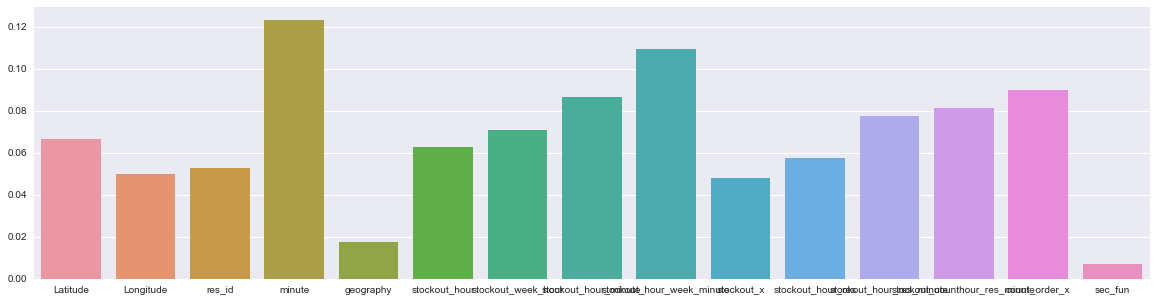

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20,5))
sns.barplot(col,clf.feature_importances_)

In [184]:
pd.DataFrame(clf.feature_importances_,index=col).sort_values(by=0)

,0
sec_fun,0.006979
geography,0.017589
stockout_x,0.047756
Longitude,0.050042
res_id,0.052776
stockout_hour_res,0.057317
stockout_hour,0.062726
Latitude,0.066539
stockout_week_hour,0.071022
stockout_hour_res_minute,0.077600


In [185]:
sub=pd.read_csv('test/submission_online_testcase.csv')

In [186]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [187]:
sub['stockout']=clf.predict(test[X.columns])[:len(sub)]

In [188]:
sub.to_csv('submi/hmsub_allfeat_count.csv',index=None)

In [189]:
sub.stockout.sum()

597